1/ Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("glass.csv")

2/ Проведите первичный анализ.
а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

3/ Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = df['Type']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

4/ Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=4, random_state=0)

5/ Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [11]:
print("Train R2: {}".format(clf.score(X_train, y_train)))
print("Test R2: {}".format(clf.score(X_test, y_test)))

Train R2: 0.8421052631578947
Test R2: 0.813953488372093


6/ Обработайте выбросы в данных.
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
b) Исследуйте признаки на выбросы несколькими способами.
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

array([<AxesSubplot:title={'center':'RI'}>,
       <AxesSubplot:title={'center':'Na'}>,
       <AxesSubplot:title={'center':'Mg'}>,
       <AxesSubplot:title={'center':'Al'}>,
       <AxesSubplot:title={'center':'Si'}>,
       <AxesSubplot:title={'center':'K'}>,
       <AxesSubplot:title={'center':'Ca'}>,
       <AxesSubplot:title={'center':'Ba'}>,
       <AxesSubplot:title={'center':'Fe'}>,
       <AxesSubplot:title={'center':'Type'}>], dtype=object)

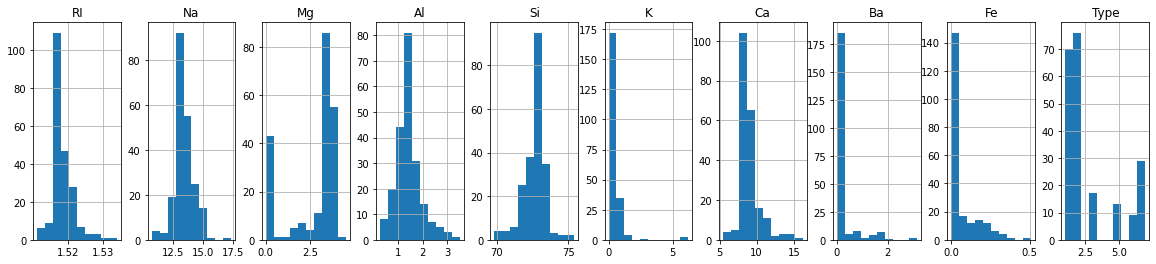

In [30]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 10, figsize=(20,4))

df.hist(ax=axis)

In [55]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 3, min_samples = 9)
model = dbscan.fit(X)
labels = model.labels_ 

# -1 value in anomaly_score column signifies that the data is anomalous
df["anomaly_score"] = labels
anomalies = df[df.anomaly_score == -1]
anomalies

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,anomaly_score
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,-1
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2,-1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,-1
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,-1
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,-1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,-1


In [58]:
df_v1 = df[df['anomaly_score'] != -1]
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             208 non-null    float64
 1   Na             208 non-null    float64
 2   Mg             208 non-null    float64
 3   Al             208 non-null    float64
 4   Si             208 non-null    float64
 5   K              208 non-null    float64
 6   Ca             208 non-null    float64
 7   Ba             208 non-null    float64
 8   Fe             208 non-null    float64
 9   Type           208 non-null    int64  
 10  anomaly_score  208 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 19.5 KB


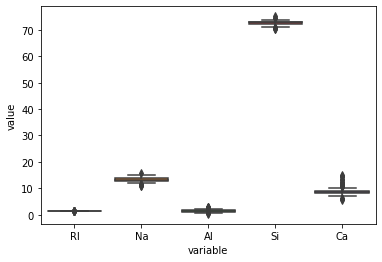

In [59]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="variable", y="value", data=pd.melt(df_v1[['RI', 'Na', 'Al', 'Si','Ca']]))

plt.show()

In [60]:
outlier_ri_high = np.quantile(df['RI'], 0.75) + 1.5*(np.quantile(df['RI'], 0.75)-np.quantile(df['RI'], 0.25))
outlier_na_high = np.quantile(df['Na'], 0.75) + 1.5*(np.quantile(df['Na'], 0.75)-np.quantile(df['Na'], 0.25))
outlier_al_high = np.quantile(df['Al'], 0.75) + 1.5*(np.quantile(df['Al'], 0.75)-np.quantile(df['Al'], 0.25))
outlier_si_high = np.quantile(df['Si'], 0.75) + 1.5*(np.quantile(df['Si'], 0.75)-np.quantile(df['Si'], 0.25))
outlier_ca_high = np.quantile(df['Ca'], 0.75) + 1.5*(np.quantile(df['Ca'], 0.75)-np.quantile(df['Ca'], 0.25))

outlier_ri_low = np.quantile(df['RI'], 0.75) - 1.5*(np.quantile(df['RI'], 0.75)-np.quantile(df['RI'], 0.25))
outlier_na_low = np.quantile(df['Na'], 0.75) - 1.5*(np.quantile(df['Na'], 0.75)-np.quantile(df['Na'], 0.25))
outlier_al_low = np.quantile(df['Al'], 0.75) - 1.5*(np.quantile(df['Al'], 0.75)-np.quantile(df['Al'], 0.25))
outlier_si_low = np.quantile(df['Si'], 0.75) - 1.5*(np.quantile(df['Si'], 0.75)-np.quantile(df['Si'], 0.25))
outlier_ca_low = np.quantile(df['Ca'], 0.75) - 1.5*(np.quantile(df['Ca'], 0.75)-np.quantile(df['Ca'], 0.25))

df_v1 = df_v1[((df_v1['RI'] < outlier_ri_high) & (df_v1['RI'] > outlier_ri_low))]
df_v1 = df_v1[((df_v1['Na'] < outlier_na_high) & (df_v1['Na'] > outlier_na_low))]
df_v1 = df_v1[((df_v1['Al'] < outlier_al_high) & (df_v1['Al'] > outlier_al_low))]
df_v1 = df_v1[((df_v1['Na'] < outlier_na_high) & (df_v1['Na'] > outlier_na_low))]
df_v1 = df_v1[((df_v1['Si'] < outlier_si_high) & (df_v1['Si'] > outlier_si_low))]
df_v1 = df_v1[((df_v1['Ca'] < outlier_ca_high) & (df_v1['Ca'] > outlier_ca_low))]
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             138 non-null    float64
 1   Na             138 non-null    float64
 2   Mg             138 non-null    float64
 3   Al             138 non-null    float64
 4   Si             138 non-null    float64
 5   K              138 non-null    float64
 6   Ca             138 non-null    float64
 7   Ba             138 non-null    float64
 8   Fe             138 non-null    float64
 9   Type           138 non-null    int64  
 10  anomaly_score  138 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 12.9 KB


In [73]:
print("Removed outliers percent: {}".format(100-len(df_v1)/len(df)*100))

Removed outliers percent: 35.51401869158879


7/ Повторите п. 4, п. 5.

In [61]:
X_ = df_v1[['RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y_ = df_v1['Type']

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=11)

clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_, y_)

print("Train R2: {}".format(clf.score(X_train, y_train)))
print("Test R2: {}".format(clf.score(X_test, y_test)))

Train R2: 0.9363636363636364
Test R2: 0.8928571428571429


Из датасета были удалены 35% записей, которые были определены как выбросы с помощью статистического метода и методом DBSCAN.
Удаление выбросов позволило увеличить точность модели Random Forest Classifier как на тестовой, так и на обучающей выборках.
Анализ данных на предмет выбросов с помощью методов EDA необходим перед началом построения моделей для получения более адекватных результатов